In [1]:
import pandas as pd
import numpy as np
import glob
import re
import os
import matplotlib.pyplot as plt

from sklearn.cluster import AffinityPropagation
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
categories = ['Science fiction', 'Horror', 'Adventure', 'Humor', 'Western', 'Mystery Fiction', 'Gothic Fiction']
#              0                  1         2            3        4          5                  6   

In [3]:
science_fiction_txt = glob.glob("books/Science Fiction/*.txt")
science_fiction_csv = glob.glob("books/Science Fiction/*.csv")
science_fiction_txt.remove('books/Science Fiction\\booksInGenre.txt')

In [4]:
adventure_txt = glob.glob("books/Adventure/*.txt")
adventure_csv = glob.glob("books/Adventure/*.csv")
adventure_txt.remove('books/Adventure\\booksInGenre.txt')

In [5]:
gothic_txt = glob.glob("books/Gothic Fiction/*.txt")
gothic_csv = glob.glob("books/Gothic Fiction/*.csv")
gothic_txt.remove('books/Gothic Fiction\\booksInGenre.txt')

In [6]:
horror_txt = glob.glob("books/Horror/*.txt")
horror_csv = glob.glob("books/Horror/*.csv")
horror_txt.remove('books/Horror\\booksInGenre.txt')

In [7]:
humor_txt = glob.glob("books/Humor/*.txt")
humor_csv = glob.glob("books/Humor/*.csv")
humor_txt.remove('books/Humor\\booksInGenre.txt')

In [8]:
mystery_txt = glob.glob("books/Mystery Fiction/*.txt")
mystery_csv = glob.glob("books/Mystery Fiction/*.csv")
mystery_txt.remove('books/Mystery Fiction\\booksInGenre.txt')

In [9]:
western_txt = glob.glob("books/Western/*.txt")
western_csv = glob.glob("books/Western/*.csv")
western_txt.remove('books/Western\\booksInGenre.txt')

In [10]:
all_books = []
science_fiction = []
horror = []
adventure = []
humor = []
western = []
mystery = []
gothic = []

for file in science_fiction_txt:
    with open(file, 'r', encoding='utf-8') as f:
        text = f.read()
        science_fiction.append(text)
        all_books.append(text)

for file in adventure_txt:
    with open(file, 'r', encoding='utf-8') as f:
        text = f.read()
        adventure.append(text)
        all_books.append(text)
        
for file in gothic_txt:
    with open(file, 'r', encoding='utf-8') as f:
        text = f.read()
        gothic.append(text)
        all_books.append(text)
        
for file in horror_txt:
    with open(file, 'r', encoding='utf-8') as f:
        text = f.read()
        horror.append(text)
        all_books.append(text)
        
for file in humor_txt:
    with open(file, 'r', encoding='utf-8') as f:
        text = f.read()
        humor.append(text)
        all_books.append(text)
        
for file in mystery_txt:
    with open(file, 'r', encoding='utf-8') as f:
        text = f.read()
        mystery.append(text)
        all_books.append(text)
        
for file in western_txt:
    with open(file, 'r', encoding='utf-8') as f:
        text = f.read()
        western.append(text)
        all_books.append(text)
        
print(len(all_books))

1266


In [11]:
all_csvs = science_fiction_csv
all_csvs.extend(adventure_csv)
all_csvs.extend(gothic_csv)
all_csvs.extend(horror_csv)
all_csvs.extend(humor_csv)
all_csvs.extend(mystery_csv)
all_csvs.extend(western_csv)
all_meta_datas = []
for file in all_csvs:
    with open(file, 'r', encoding='utf-8') as f:
        text = f.read()
        all_meta_datas.append(text)  

authors = []
genres = []
for val in all_meta_datas:
    entry = val.split("\n")
    pieces = entry[0].split(",", 1)
    genre = 0
    if 'author' or 'contributor' in pieces[0].lower():
        authors.append(pieces[1])
    if 'science' in val.lower():
        genre +=1
    if 'horror' in val.lower():
        genre +=2
    if 'adventure' in val.lower():
        genre +=4
    if 'humor' in val.lower():
        genre +=8
    if 'west' in val.lower():
        genre +=16
    if 'mystery' in val.lower():
        genre +=32
    if 'gothic' in val.lower():
        genre +=64
    genres.append(genre)
print(len(genres))
print(len(authors))

1266
1266


In [12]:
def clean_text(text):
    """
    Applies some pre-processing on the given text.

    Steps :
    - Removing HTML tags
    - Removing punctuation
    - Lowering text
    """
    
    # remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # remove the characters [\], ['] and ["]
    text = re.sub(r"\\", "", text)    
    text = re.sub(r"\'", "", text)    
    text = re.sub(r"\"", "", text)
    
    # remove numbers including unsigned / signed integers and floats
    text = re.sub(r"[0-9]+", "", text)
    text = re.sub(r"[-0-9]+", "", text)
    text = re.sub(r"[+.0-9]+", "", text)
    
    # convert text to lowercase
    text = text.strip().lower()
    
    # replace punctuation characters with spaces
    filters='!"\'#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
    translate_dict = dict((c, " ") for c in filters)
    translate_map = str.maketrans(translate_dict)
    text = text.translate(translate_map)
    
    # remove non-ascii characters
    text = re.sub(r'[^\x00-\x7F]+','', text)

    return text

In [13]:
author_dict = {}
author_list = []
author_count = 0
for author in authors:
    if author in author_dict.keys():
        author_list.append(author_dict.get(author))
    else:
        author_dict[author] = author_count
        author_list.append(author_count)
        author_count+= 1
print(len(author_list))

1266


In [14]:
df_test = pd.DataFrame({'author':author_list, 'genres': genres})
print(df_test)

      author  genres
0          0       1
1          1       1
2          2       5
3          3       1
4          4       1
...      ...     ...
1261     371       0
1262     371      16
1263     372      16
1264     372      16
1265     371       0

[1266 rows x 2 columns]


In [15]:
#clusterer1 = KMeans(max_iter=20000, n_clusters = 7)
#clusterer2 = AffinityPropagation(max_iter=20000)
#model1 = clusterer1.fit(df_test)
#model2 = clusterer2.fit(df_test)

In [17]:
def kmeans_tests(subject_class, titles):
    vectorizer = CountVectorizer(stop_words="english", preprocessor=clean_text, strip_accents="ascii")
    text_features = vectorizer.fit_transform(subject_class)
    
    sum_of_squared_distances = []
    K = range(1, min(text_features.shape[0], 25))
    for k in K:
        km = KMeans(n_clusters=k)
        km = km.fit(text_features)
        sum_of_squared_distances.append(km.inertia_)
    plt.plot(K, sum_of_squared_distances, 'bx-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Sum of Squared Distances')
    plt.title('Optimal Number of Clusters')
    plt.show()
    
    labels = KMeans(n_clusters=5).fit(text_features)
    output = [[],[],[],[],[]]
    for i, label in enumerate(labels.labels_):
        output[label].append(titles[i].split("\\")[1])
    for i in range(0, len(output)):
        print("Cluster %d \n" % i)
        for thing in output[i]:
            print(thing)
        print("\n")
    

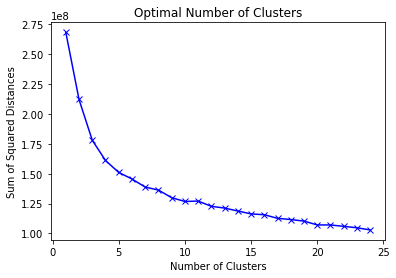

Cluster 0 

$1,000 a Plate.txt
2 B R 0 2 B.txt
20,000 Leagues under the Sea.txt
A Bad Day for Sales.txt
A Bad Day for Vermin.txt
A Bottle of Old Wine.txt
A City Near Centaurus.txt
A Coffin for Jacob.txt
A Fall of Glass.txt
A Filbert Is a Nut.txt
A Gift from Earth.txt
A Gleeb for Earth.txt
A Journey to the Center of the Earth.txt
A Little Journey.txt
A Martian Odyssey.txt
A Matter of Importance.txt
A Matter of Proportion.txt
A Pail of Air.txt
A Place in the Sun.txt
A Place so Foreign.txt
A Princess of Mars.txt
A Question of Courage.txt
A Scientist Rises.txt
A Slave is a Slave.txt
A Spaceship Named McGuire.txt
A Stone and a Spear.txt
A Thousand Degrees Below Zero.txt
A Transmutation of Muddles.txt
A Traveler in Time.txt
A Witch Shall Be Born.txt
A World by the Tale.txt
A World Called Crimson.txt
A World is Born.txt
Accidental Death.txt
Acid Bath.txt
Adaptation.txt
Adolescents Only.txt
Advance Agent.txt
Advanced Chemistry.txt
Alarm Clock.txt
Alien Offer.txt
All Cats Are Gray.txt
All Day S

In [18]:
kmeans_tests(science_fiction, science_fiction_txt)

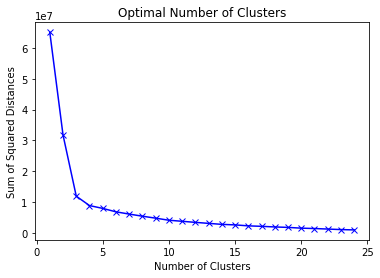

Cluster 0 

The House of Souls.txt
The Jewel of Seven Stars.txt
The Lady of the Shroud.txt
The Man.txt
The Sorcery Club.txt
The Trial.txt
Widdershins.txt


Cluster 1 

The Night Land.txt


Cluster 2 

Varney the Vampire; Or, the Feast of Blood.txt


Cluster 3 

A Thin Ghost and Others.txt
An Occurrence at Owl Creek Bridge.txt
Carmilla.txt
Dracula.txt
Metamorphosis.txt
The Damned.txt
The Great God Pan.txt
The House of the Vampire.txt
The Shunned House.txt
The Strange Case of Dr. Jekyll and Mr. Hyde.txt
The Vampyre; a Tale.txt
The Wendigo.txt
The Willows.txt


Cluster 4 

Animal Ghosts; Or, Animal Hauntings and the Hereafter.txt
Dracula's Guest.txt
Four Weird Tales.txt
Ghost Stories of an Antiquary.txt
Scottish Ghost Stories.txt
The House on the Borderland.txt
The King in Yellow.txt
The Lair of the White Worm.txt
The Lost Stradivarius.txt
The Turn of the Screw.txt
The Works of Edgar Allan Poe — Volume 1.txt
The Works of Edgar Allan Poe — Volume 2.txt
The Works of Edgar Allan Poe — Volume

In [19]:
kmeans_tests(horror, horror_txt)

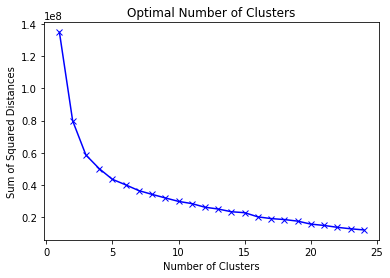

Cluster 0 

Allan and the Holy Flower.txt
Allan Quatermain.txt
Ayesha, the Return of She.txt
Bones in London.txt
Captain Blood.txt
Catriona.txt
Child of Storm.txt
Finished.txt
Greenmantle.txt
Kidnapped.txt
Kim.txt
King Solomon's Mines.txt
Moby-Dick; or, The Whale.txt
Moonfleet.txt
Mr. Standfast.txt
Rung Ho! A Novel.txt
Sanders of the River.txt
She and Allan.txt
She.txt
The Ancient Allan.txt
The Eye of Zeitoon.txt
The Ivory Child.txt
The Ivory Trail.txt
The Keepers of the King's Peace.txt
The People of the Mist.txt


Cluster 1 

The Three Musketeers.txt
Twenty Years After.txt


Cluster 2 

The Count of Monte Cristo, Illustrated.txt


Cluster 3 

Affair in Araby.txt
Allan's Wife.txt
Around the World in Eighty Days.txt
Caesar Dies.txt
Caves of Terror.txt
Hunter Quatermain's Story.txt
Jimgrim and Allah's Peace.txt
Jungle Tales of Tarzan.txt
Maiwa's Revenge; Or, The War of the Little Hand.txt
Prester John.txt
Punch, or the London Charivari, Volume 156, April 2, 1919.txt
Tarzan and the Jewel

In [20]:
kmeans_tests(adventure, adventure_txt)

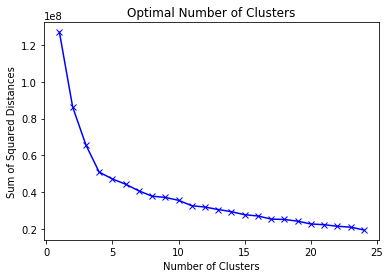

Cluster 0 

'Oh, Well, You Know How Women Are!'.txt
A Book of Burlesques.txt
A Book of Nonsense.txt
A Christmas Garland.txt
A House-Boat on the Styx.txt
A Humorous History of England.txt
A Man of Means.txt
Baboo Jabberjee, B.A..txt
Behind the Beyond, and Other Contributions to Human Knowledge.txt
Bill Nye's Cordwood.txt
Comic History of England.txt
Comic History of the United States.txt
Continuous Vaudeville.txt
Eliza.txt
English as she is spoke; or, a jest in sober earnest.txt
Fables for the Frivolous.txt
Ghosts I Have Met and Some Others.txt
Grimm Tales Made Gay.txt
Joe Miller's Jests, or The Wits Vade-Mecum.txt
Laughable Lyrics.txt
Literary Lapses.txt
More Nonsense.txt
Mr. Munchausen Being a True Account of Some of the Recent Adventures beyond the Styx of the Late Hieronymus Carl Friedrich, Sometime Baron Munchausen of Bodenwerder.txt
Mr. Punch at the Seaside.txt
Mr. Punch in Bohemia.txt
Mr. Punch in the Highlands.txt
Mr. Punch in the Hunting Field.txt
Mr. Punch with the Children.tx

In [21]:
kmeans_tests(humor, humor_txt)

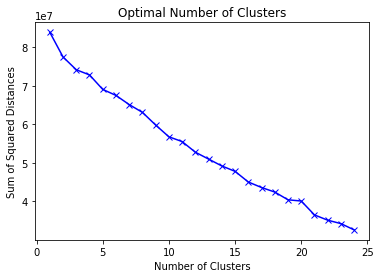

Cluster 0 

Astoria; Or, Anecdotes of an Enterprise Beyond the Rocky Mountains.txt
Betty Zane.txt
Tales of lonely trails.txt
The Day of the Beast.txt
The Hidden Children.txt
The Last Trail.txt
The Light of the Western Stars.txt
The Man of the Forest.txt
The Rainbow Trail.txt


Cluster 1 

A Deal in Wheat and Other Stories of the New and Old West.txt
A Texas Matchmaker.txt
Bar-20 Days.txt
Bull Hunter.txt
Cabin Fever.txt
Casey Ryan.txt
Chip, of the Flying U.txt
Cow-Country.txt
Going Some.txt
Good Indian.txt
Her Prairie Knight.txt
Hopalong Cassidy's Rustler Round-Up; Or, Bar-20.txt
Jean of the Lazy A.txt
Laughing Bill Hyde and Other Stories.txt
Lonesome Land.txt
Pardners.txt
Rebel Spurs.txt
Ride Proud, Rebel!.txt
Riders of the Purple Sage.txt
Ronicky Doone.txt
Rowdy of the Cross L.txt
Skyrider.txt
Starr, of the Desert.txt
Sunset Pass; or, Running the Gauntlet Through Apache Land.txt
The Beautiful Eyes of Ysidria.txt
The Call of the Canyon.txt
The Cross-Cut.txt
The Flying U Ranch.txt
The F

In [22]:
kmeans_tests(western, western_txt)

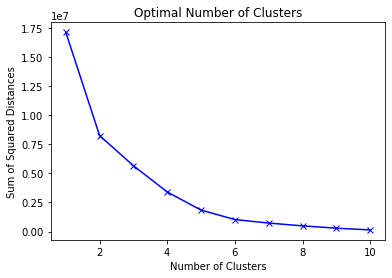

Cluster 0 

The Woman in White.txt


Cluster 1 

Greenmantle.txt
The Thirty-Nine Steps.txt
The Works of Edgar Allan Poe — Volume 1.txt
The Works of Edgar Allan Poe — Volume 2.txt
The Works of Edgar Allan Poe — Volume 3.txt
The Works of Edgar Allan Poe — Volume 4.txt
The Works of Edgar Allan Poe — Volume 5.txt


Cluster 2 

The Moonstone.txt


Cluster 3 

Dracula.txt


Cluster 4 

The Mystery of Edwin Drood.txt




In [23]:
kmeans_tests(mystery, mystery_txt)

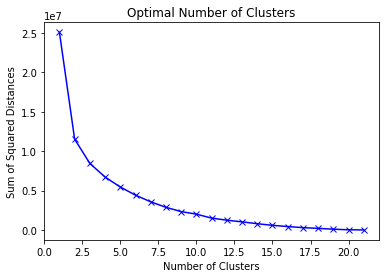

Cluster 0 

The Mysteries of Udolpho.txt


Cluster 1 

Carmilla.txt
Confessions of an English Opium-Eater.txt
Frankenstein; Or, The Modern Prometheus.txt
Nightmare Abbey.txt
The Castle of Otranto.txt
The History of Caliph Vathek.txt
The Lair of the White Worm.txt
The Monkey's PawThe Lady of the Barge and Others, Part 2..txt
The Strange Case of Dr. Jekyll and Mr. Hyde.txt
The Turn of the Screw.txt
The Vampyre; a Tale.txt
The Yellow Wallpaper.txt


Cluster 2 

Dracula.txt


Cluster 3 

Caleb Williams; Or, Things as They Are.txt


Cluster 4 

Mosses from an Old Manse, and Other Stories.txt
Northanger Abbey.txt
The Phantom of the Opera.txt
The Picture of Dorian Gray.txt
The Private Memoirs and Confessions of a Justified Sinner.txt
The Works of Edgar Allan Poe — Volume 2.txt
Wuthering Heights.txt




In [24]:
kmeans_tests(gothic, gothic_txt)

In [27]:
def kmeans_tests2(subject_class, titles):
    vectorizer = TfidfVectorizer(stop_words="english", preprocessor=clean_text, strip_accents="ascii")
    text_features = vectorizer.fit_transform(subject_class)
    
    sum_of_squared_distances = []
    K = range(1, min(text_features.shape[0], 25))
    for k in K:
        km = KMeans(n_clusters=k)
        km = km.fit(text_features)
        sum_of_squared_distances.append(km.inertia_)
    plt.plot(K, sum_of_squared_distances, 'bx-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Sum of Squared Distances')
    plt.title('Optimal Number of Clusters')
    plt.show()
    
    labels = KMeans(n_clusters=5).fit(text_features)
    output = [[],[],[],[],[]]
    for i, label in enumerate(labels.labels_):
        output[label].append(titles[i].split("\\")[1])
    for i in range(0, len(output)):
        print("Cluster %d \n" % i)
        for thing in output[i]:
            print(thing)
        print("\n")
    

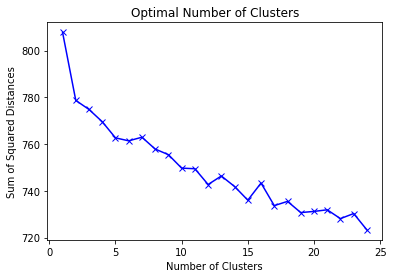

Cluster 0 

Occasion for Disaster.txt
Out Like a Light.txt
Supermind.txt
That Sweet Little Old Lady.txt
The Impossibles.txt


Cluster 1 

Juju.txt
The Knights of Arthur.txt
The Runaway Skyscraper.txt
The Sleeper AwakesA Revised Edition of When the Sleeper Wakes.txt


Cluster 2 

A Bad Day for Sales.txt
A City Near Centaurus.txt
A Coffin for Jacob.txt
A Fall of Glass.txt
A Gift from Earth.txt
A Little Journey.txt
A Martian Odyssey.txt
A Pail of Air.txt
A Place in the Sun.txt
A Place so Foreign.txt
A Question of Courage.txt
A Spaceship Named McGuire.txt
A Stone and a Spear.txt
A Transmutation of Muddles.txt
A Traveler in Time.txt
A World by the Tale.txt
A World is Born.txt
Acid Bath.txt
Adolescents Only.txt
Advance Agent.txt
Alarm Clock.txt
Alien Offer.txt
All Day September.txt
All Jackson's Children.txt
Amateur in Chancery.txt
An Elephant for the Prinkip.txt
Anchorite.txt
Angel's Egg.txt
Appointment In Tomorrow.txt
Arcturus Times Three.txt
Arm of the Law.txt
Ask a Foolish Question.txt
A

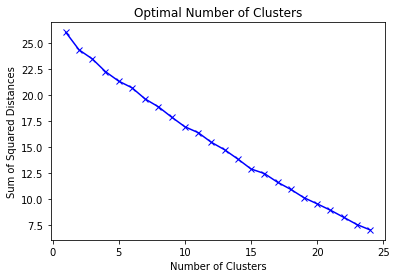

Cluster 0 

Dracula's Guest.txt
Four Weird Tales.txt
The Jewel of Seven Stars.txt
The King in Yellow.txt
The Lady of the Shroud.txt
The Lair of the White Worm.txt
The Man.txt
The Night Land.txt
The Wendigo.txt
The Willows.txt
Widdershins.txt


Cluster 1 

The Great God Pan.txt
The House of Souls.txt


Cluster 2 

An Occurrence at Owl Creek Bridge.txt
Dracula.txt
The Shunned House.txt
The Vampyre; a Tale.txt


Cluster 3 

A Thin Ghost and Others.txt
Animal Ghosts; Or, Animal Hauntings and the Hereafter.txt
Carmilla.txt
Ghost Stories of an Antiquary.txt
Metamorphosis.txt
Scottish Ghost Stories.txt
The Damned.txt
The House of the Vampire.txt
The House on the Borderland.txt
The Lost Stradivarius.txt
The Sorcery Club.txt
The Strange Case of Dr. Jekyll and Mr. Hyde.txt
The Trial.txt
The Turn of the Screw.txt
Twenty-Five Ghost Stories.txt
Varney the Vampire; Or, the Feast of Blood.txt


Cluster 4 

The Works of Edgar Allan Poe — Volume 1.txt
The Works of Edgar Allan Poe — Volume 2.txt
The Wor

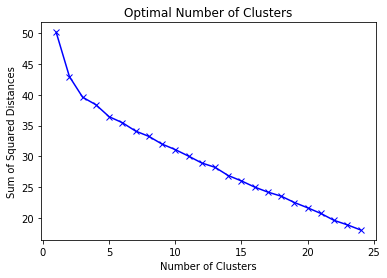

Cluster 0 

Louise de la Valliere.txt
Ten Years Later.txt
The Man in the Iron Mask.txt
The Three Musketeers.txt
The Vicomte De Bragelonne.txt
Twenty Years After.txt


Cluster 1 

Hunter Quatermain's Story.txt
Jungle Tales of Tarzan.txt
Punch, or the London Charivari, Volume 156, April 2, 1919.txt
Tarzan and the Jewels of Opar.txt
Tarzan of the Apes.txt
Tarzan the Terrible.txt
Tarzan the Untamed.txt
The Beasts of Tarzan.txt
The Call of the Wild.txt
The Oakdale Affair.txt
The Son of Tarzan.txt


Cluster 2 

Bones in London.txt
Sanders of the River.txt
The Book of All-Power.txt
The Keepers of the King's Peace.txt
The Prisoner of Zenda.txt


Cluster 3 

The Count of Monte Cristo, Illustrated.txt
The Elusive Pimpernel.txt
The League of the Scarlet Pimpernel.txt
The Scarlet Pimpernel.txt


Cluster 4 

Affair in Araby.txt
Allan and the Holy Flower.txt
Allan Quatermain.txt
Allan's Wife.txt
Around the World in Eighty Days.txt
Ayesha, the Return of She.txt
Caesar Dies.txt
Captain Blood.txt
Catri

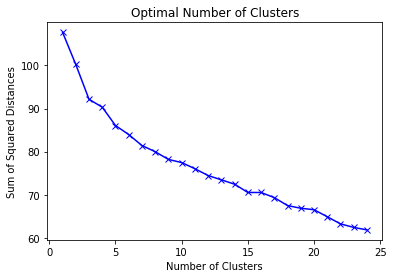

Cluster 0 

Death at the Excelsior, and Other Stories.txt
My Man Jeeves.txt
Right Ho, Jeeves.txt


Cluster 1 

Around the World with Josiah Allen's Wife.txt
Samantha among the Brethren — Volume 1.txt
Samantha among the Brethren — Volume 2.txt
Samantha among the Brethren — Volume 3.txt
Samantha among the Brethren — Volume 4.txt
Samantha among the Brethren — Volume 5.txt
Samantha among the Brethren — Volume 6.txt
Samantha among the Brethren — Volume 7.txt
Samantha Among the Brethren, Complete.txt
Samantha at Saratoga.txt
Samantha at the St. Louis Exposition.txt
Samantha at the World's Fair.txt
Samantha on the Woman Question.txt


Cluster 2 

'Oh, Well, You Know How Women Are!'.txt
A Book of Nonsense.txt
A Humorous History of England.txt
Comic History of England.txt
English as she is spoke; or, a jest in sober earnest.txt
Fables for the Frivolous.txt
Grimm Tales Made Gay.txt
Laughable Lyrics.txt
More Nonsense.txt
Mr. Punch at the Seaside.txt
Mr. Punch in Bohemia.txt
Mr. Punch in the Highl

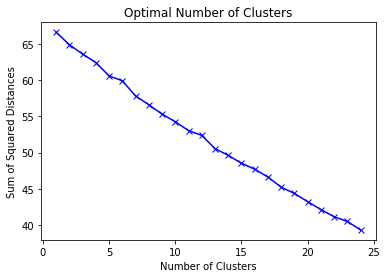

Cluster 0 

Chip, of the Flying U.txt
Rowdy of the Cross L.txt
The Flying U Ranch.txt
The Flying U's Last Stand.txt
The Happy Family.txt
The Heritage of the Sioux.txt
The Lonesome Trail and Other Stories.txt
The Long Shadow.txt
The Lure of the Dim Trails.txt
The Phantom Herd.txt
The Trail of the White Mule.txt
Way of the Lawless.txt


Cluster 1 

Starr, of the Desert.txt
The Last Trail.txt
The Man of the Forest.txt


Cluster 2 

The Night Horseman.txt
The Seventh Man.txt
The Untamed.txt


Cluster 3 

The U. P. Trail.txt


Cluster 4 

A Deal in Wheat and Other Stories of the New and Old West.txt
A Texas Matchmaker.txt
Astoria; Or, Anecdotes of an Enterprise Beyond the Rocky Mountains.txt
Bar-20 Days.txt
Betty Zane.txt
Black Jack.txt
Bull Hunter.txt
Cabin Fever.txt
Casey Ryan.txt
Cow-Country.txt
Desert Gold.txt
Going Some.txt
Good Indian.txt
Gunman's Reckoning.txt
Harrigan.txt
Heart of the Sunset.txt
Her Prairie Knight.txt
Hopalong Cassidy's Rustler Round-Up; Or, Bar-20.txt
Jean of the L

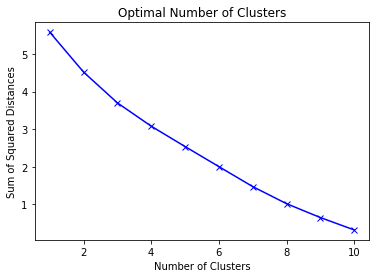

Cluster 0 

The Works of Edgar Allan Poe — Volume 1.txt
The Works of Edgar Allan Poe — Volume 2.txt
The Works of Edgar Allan Poe — Volume 3.txt
The Works of Edgar Allan Poe — Volume 4.txt
The Works of Edgar Allan Poe — Volume 5.txt


Cluster 1 

The Mystery of Edwin Drood.txt


Cluster 2 

The Moonstone.txt
The Woman in White.txt


Cluster 3 

Dracula.txt


Cluster 4 

Greenmantle.txt
The Thirty-Nine Steps.txt




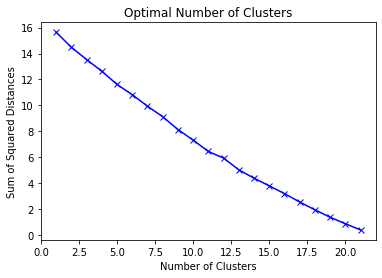

Cluster 0 

Caleb Williams; Or, Things as They Are.txt
Nightmare Abbey.txt


Cluster 1 

Carmilla.txt
Confessions of an English Opium-Eater.txt
Dracula.txt
Frankenstein; Or, The Modern Prometheus.txt
Mosses from an Old Manse, and Other Stories.txt
The History of Caliph Vathek.txt
The Lair of the White Worm.txt
The Mysteries of Udolpho.txt
The Phantom of the Opera.txt
The Picture of Dorian Gray.txt
The Private Memoirs and Confessions of a Justified Sinner.txt
The Strange Case of Dr. Jekyll and Mr. Hyde.txt
The Turn of the Screw.txt
The Works of Edgar Allan Poe — Volume 2.txt


Cluster 2 

Northanger Abbey.txt
Wuthering Heights.txt


Cluster 3 

The Monkey's PawThe Lady of the Barge and Others, Part 2..txt
The Vampyre; a Tale.txt
The Yellow Wallpaper.txt


Cluster 4 

The Castle of Otranto.txt




In [28]:
kmeans_tests2(science_fiction, science_fiction_txt)
kmeans_tests2(horror, horror_txt)
kmeans_tests2(adventure, adventure_txt)
kmeans_tests2(humor, humor_txt)
kmeans_tests2(western, western_txt)
kmeans_tests2(mystery, mystery_txt)
kmeans_tests2(gothic, gothic_txt)